In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("E:\Machine Learning\data sets\heart_disease.csv") #read the data set
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains

    1.age - age in years
    2.sex - (1 = male; 0 = female)
    3.cp - chest pain type
    4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    5.chol - serum cholestoral in mg/dl
    6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7.restecg - resting electrocardiographic results
    8.thalach - maximum heart rate achieved
    9.exang - exercise induced angina (1 = yes; 0 = no)
    10.oldpeak - ST depression induced by exercise relative to rest
    11.slope - the slope of the peak exercise ST segment
    12.ca - number of major vessels (0-3) colored by flourosopy
    13.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    14.target - have disease or not (1=yes, 0=no)

In [3]:
df.corr()   #corrrelation analysis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


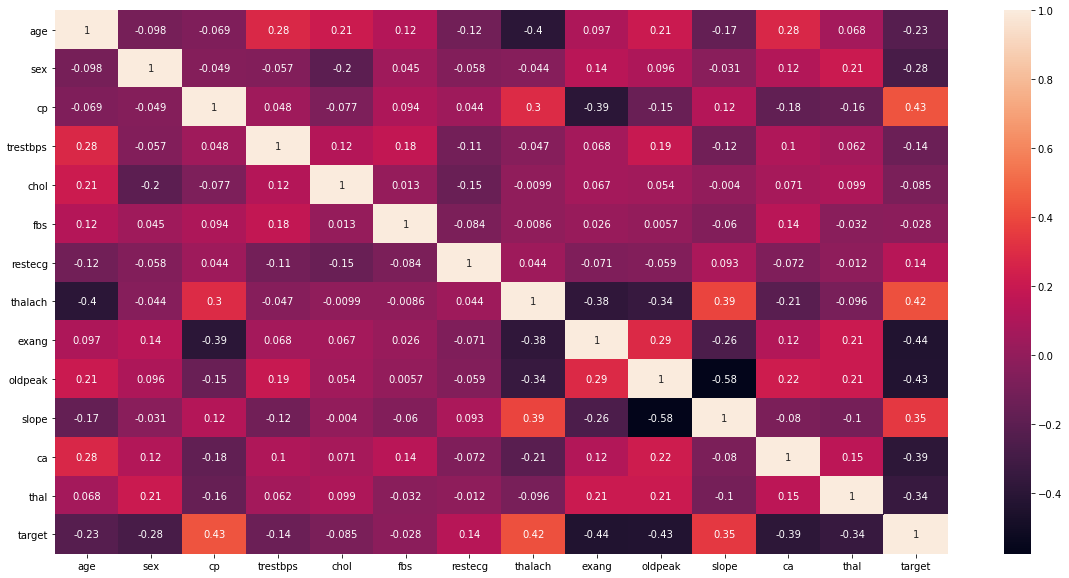

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)  #none of the features are not correlated

In [5]:
df.isna().sum()  #NaN value values is Zero

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.columns #columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Explore the data set

In [7]:
print(df["target"].value_counts())   #Studying the Target series

havedisease = len(df[df["target"]==1])
nothavedisease = len(df[df["target"]==0])
print("{:.2f} % of people have Heart Disease".format(havedisease/(len(df.target))*100))
print("{:.2f} % of people not have Heart Disease".format(nothavedisease/(len(df.target))*100))

1    165
0    138
Name: target, dtype: int64
54.46 % of people have Heart Disease
45.54 % of people not have Heart Disease


Text(0.5, 1.0, 'Heart Disease Frequency')

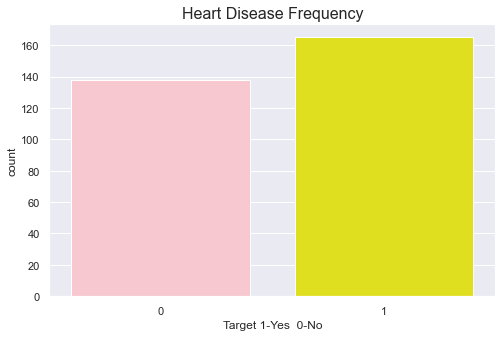

In [8]:
sns.set(style="darkgrid")   #plot the target values
plt.figure(figsize=(8,5))
sns.countplot(x="target",data=df,palette=["pink","yellow"])
plt.xlabel("Target 1-Yes  0-No")
plt.title("Heart Disease Frequency",fontsize=16)

Text(0.5, 1.0, 'Heart Disease Frequency Acctoding to Age')

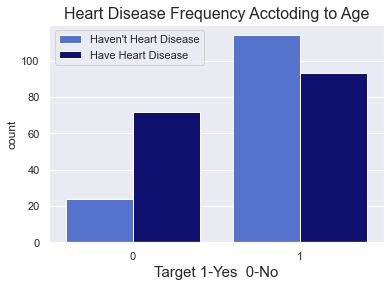

In [9]:
sns.countplot(x="sex", hue="target", data=df,palette=["royalblue", "navy"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"])
plt.xlabel("Target 1-Yes  0-No",fontsize=15)
plt.title("Heart Disease Frequency Acctoding to Age",fontsize=16)

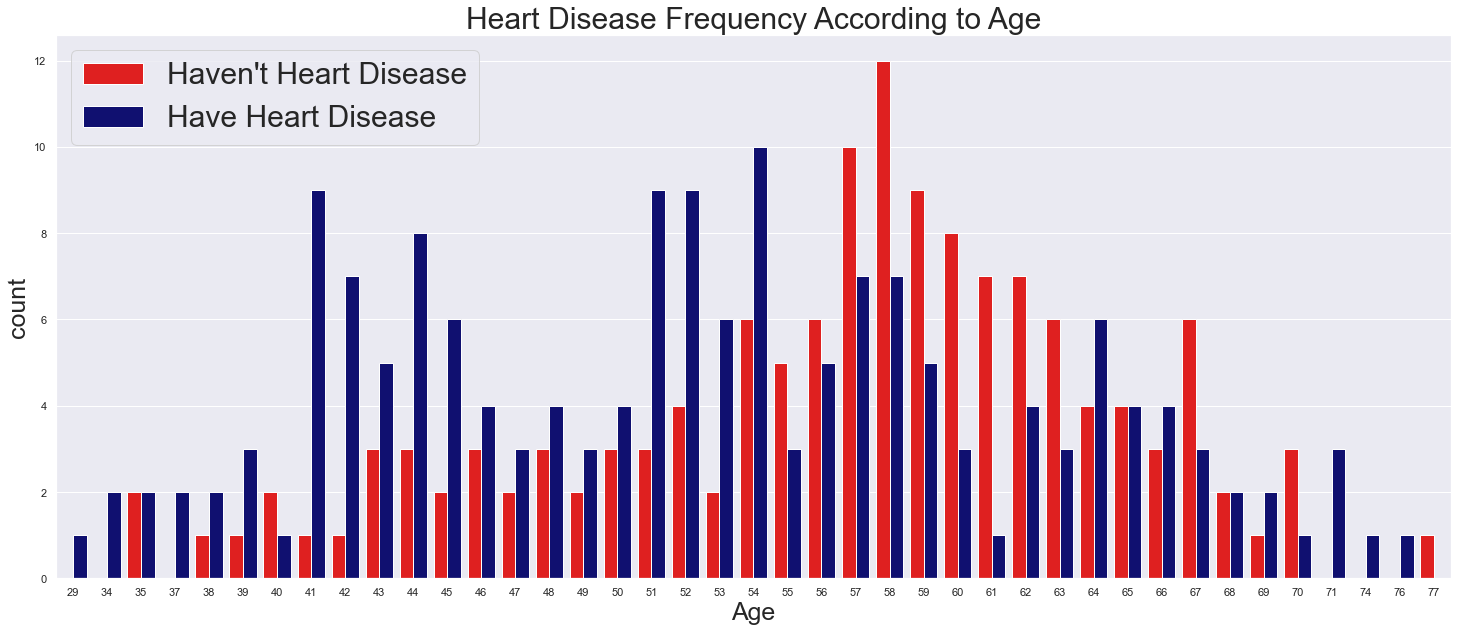

In [10]:
plt.figure(figsize=(25,10)) 
sns.countplot(x="age", hue="target", data=df,palette= ["red","navy"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"],loc=2,fontsize=30)
plt.title("Heart Disease Frequency According to Age",fontsize=30)
plt.xlabel("Age",fontsize=25)
plt.ylabel("count",fontsize=25)
plt.show()

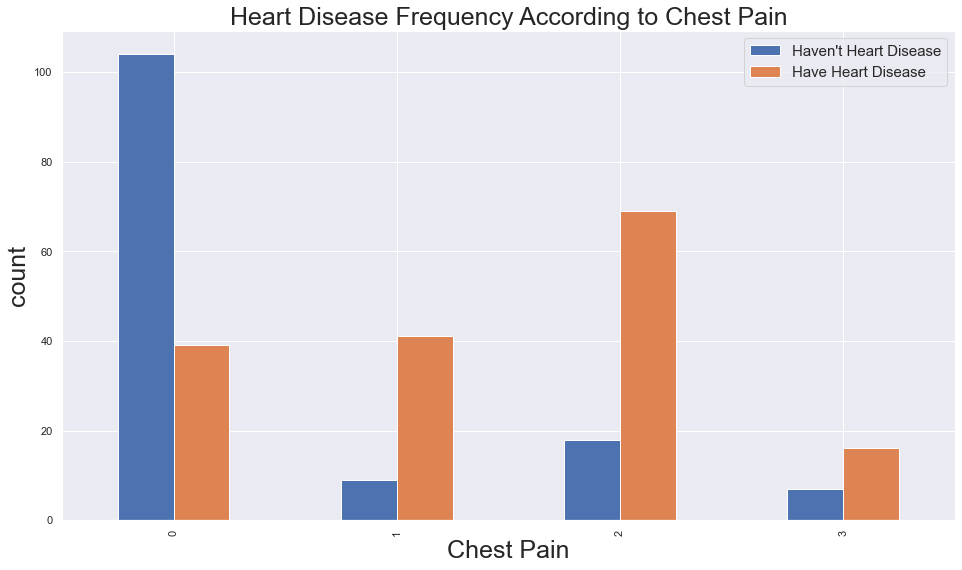

In [11]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(16,9))
plt.legend(["Haven't Heart Disease","Have Heart Disease"],fontsize=15)
plt.title("Heart Disease Frequency According to Chest Pain",fontsize=25)
plt.xlabel("Chest Pain",fontsize=25)
plt.ylabel("count",fontsize=25)
plt.show()

Text(0.5, 1.0, 'Heart Disease Frequency Acctoding to Fasting blood sugar')

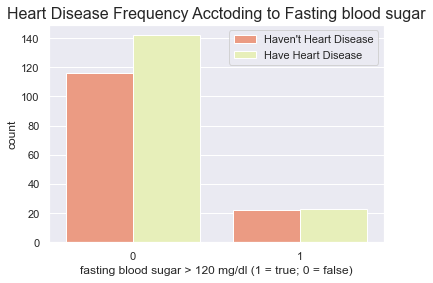

In [12]:
sns.countplot(df["fbs"],hue=df["target"],palette=["#fc9272","#edf8b1"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"])
plt.xlabel("fasting blood sugar > 120 mg/dl (1 = true; 0 = false)")
plt.title("Heart Disease Frequency Acctoding to Fasting blood sugar",fontsize=16)

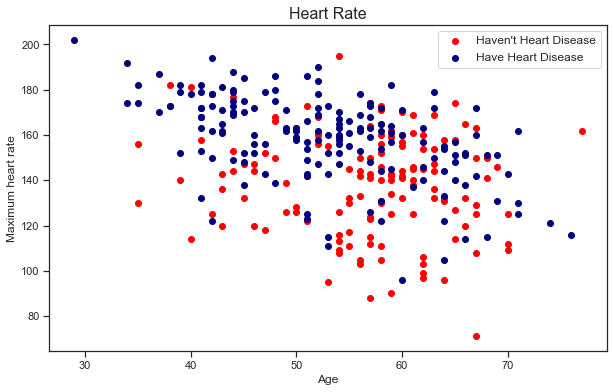

In [13]:
sns.set_style("ticks")
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df["target"]==0],df["thalach"][df["target"]==0],color="red",label="Haven't Heart Disease")
plt.scatter(df["age"][df["target"]==1],df["thalach"][df["target"]==1],color="navy",label="Have Heart Disease")
plt.legend(fontsize=12)
plt.title("Heart Rate",fontsize=16)
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.grid(False)
plt.show()

### Creating Dummy Variables

In [14]:
cp = pd.get_dummies(df.cp,prefix="cp")  #creating dummy variables for categorical features
thal = pd.get_dummies(df.thal,prefix="thal")
ca = pd.get_dummies(df.ca,prefix="ca")

In [15]:
df.drop(["cp","thal","ca"],axis=1,inplace=True)#concatinate the dummy variables with the dataset
dummy = [df,cp,ca,thal]
data = pd.concat(dummy,axis=1)

In [16]:
x = data.drop("target",axis=1)
y= data["target"]

## Split Data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#getting training set and testing set 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)   

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 23)
(61, 23)
(242,)
(61,)


## Model Selection

In [20]:
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier   #Using Randomforest algorithm
random = RandomForestClassifier(n_estimators=1000,random_state=0)
random.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [21]:
y_pre_train = random.predict(x_train)

In [22]:
y_pre_rfc = random.predict(x_test)

In [23]:
print("Training Accuracy Rate {:.2f} %".format((metrics.accuracy_score(y_train,y_pre_train))*100))

Training Accuracy Rate 100.00 %


In [24]:
print("Testing Accuracy Score {:.2f} %".format((random.score(x_test,y_test))*100))

Testing Accuracy Score 83.61 %


In [25]:
accuracy_rfc = (metrics.accuracy_score(y_test,y_pre_rfc))*100
print("Testing Accuracy Rate {:.2f} %".format(accuracy_rfc))

Testing Accuracy Rate 83.61 %


In [26]:
import seaborn as sns

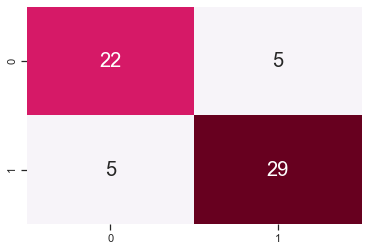

In [27]:
cm_rfc = metrics.confusion_matrix(y_test,y_pre_rfc)
sns.heatmap(cm_rfc,cmap="PuRd",annot=True,cbar=False,annot_kws={"size": 20})

In [28]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(random,x,y,cv=5)
print(f"Cross validation for Randomforest {np.mean(cv)*100} %")

Cross validation for Randomforest 82.81420765027322 %


In [29]:
from sklearn.linear_model import LogisticRegression  #Using Logistic Regression Algorithm

In [30]:
lr = LogisticRegression(random_state=0)

In [31]:
lr.fit(x_train,y_train)  #avoid the error

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
y_lr_train = lr.predict(x_train)
print("Training Accuracy Rate {:.2f} %".format((metrics.accuracy_score(y_train,y_lr_train))*100))

Training Accuracy Rate 85.95 %


In [33]:
print("Testing Accuracy Score {:.2f} %".format((lr.score(x_test,y_test))*100))

Testing Accuracy Score 88.52 %


In [34]:
y_lr_pre = lr.predict(x_test)
Accuracy_lr = (metrics.accuracy_score(y_test,y_lr_pre))*100

In [35]:
print("Testing Accuracy Rate {:.2f} %".format(Accuracy_lr))

Testing Accuracy Rate 88.52 %


In [36]:
cv_lr = cross_val_score(lr,x,y,cv=5)  #avoid the error
print(f"Cross validation for logistic regression {np.mean(cv_lr)*100} % ")

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross validation for logistic regression 84.79781420765026 % 


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

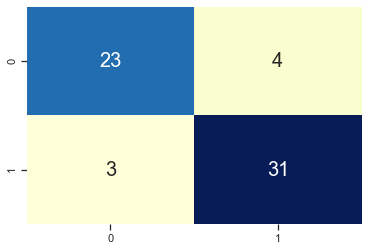

In [37]:
cm_lr = metrics.confusion_matrix(y_test,y_lr_pre)   #confussion matrix to the logistic regression
sns.heatmap(cm_lr,cmap="YlGnBu",annot=True,cbar=False,annot_kws={"size": 20})

Text(0.5, 1.0, 'Accuracy Comparision')

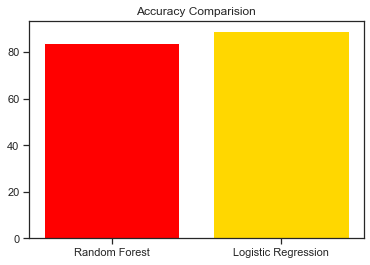

In [38]:
compare = {"Random Forest":round(accuracy_rfc),     
          "Logistic Regression":round(Accuracy_lr)}

plt.bar(compare.keys(),compare.values(),color=["red","gold"])
plt.title("Accuracy Comparision")

### Logistic Regression has a Higher accuracy rate grater than RandomForest